In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.sparse.csgraph import laplacian
from graph_optimization import fdla_weights_symmetric, fmmc_weights, lmsc_weights, fastest_averaging_constant_weight, max_degree_weights, metropolis_hastings_weights

In [3]:
def generateP(A, kappa):
	dmax = np.max(np.sum(A, axis=0))
	L = laplacian(A, normed=False)
	M, _ = np.shape(A)
	I = np.eye(M)

	P = I - (kappa/dmax) * L

	return P, get_rho(P)

def get_rho(P):
	n = P.shape[0]
	_P = P - np.ones((n, n)) * (1/n)
	l = np.abs(np.linalg.eigvals(_P))
	l = l[1 - l > 1e-5]
	return np.max(l)

True
Nodes:  4
Edges:  4


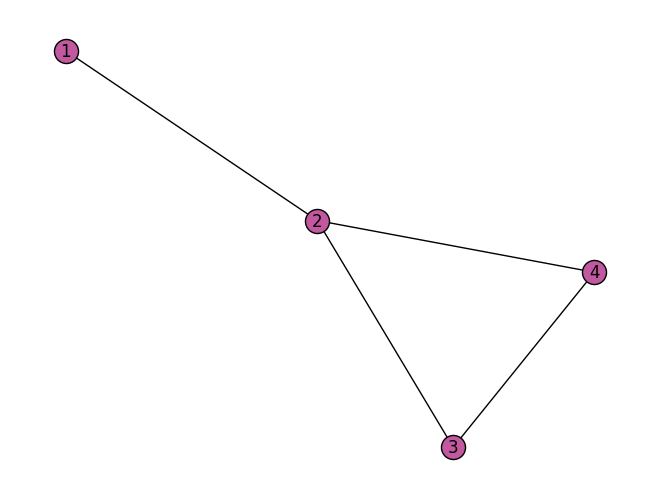

In [11]:
seeds = [80967431686, 29756843169]

colony = nx.erdos_renyi_graph(10, 0.4, seed=seeds[0])
G = nx.disjoint_union(colony, colony)
G = nx.disjoint_union(G, colony)
G = nx.disjoint_union(G, colony)
G = nx.disjoint_union(G, colony)
G.add_node(51)
G.add_edge(0, 51)
G.add_edge(11, 51)
G.add_edge(21, 51)
G.add_edge(31, 51)
G.add_edge(31, 51)
G.add_edge(41, 51)

# G = nx.erdos_renyi_graph(50, 0.4)
# G = nx.from_numpy_array(np.array([
# 		[0, 1, 1, 0, 0, 0],
# 		[1, 0, 1, 1, 0, 0],
# 		[1, 1, 0, 0, 1, 0],
# 		[0, 1, 0, 0, 1, 0],
# 		[0, 0, 1, 1, 0, 1],
# 		[0, 0, 0, 0, 1, 0],
# 	]))

# G = nx.from_numpy_array(np.load('data/saved_networks/large4_adj.npy'))
G = nx.from_numpy_array(np.array([
	[0, 1, 0, 0],
	[1, 0, 1, 1],
	[0, 1, 0, 1],
	[0, 1, 1, 0],
]))

print(nx.is_connected(G))
nx.relabel_nodes(G, {i: i+1 for i in range(G.number_of_nodes())}, copy=False)

nx.draw(G, node_color="#c158a0", edgecolors="black", pos=nx.spring_layout(G), with_labels=True)

# np.save("data/saved_networks/8_lattice_adj.npy", nx.to_numpy_array(G))
# np.save("data/saved_networks/8_lattice_inc.npy", np.asarray(nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).todense()))

print("Nodes: ", G.number_of_nodes())
print("Edges: ", G.number_of_edges())

In [8]:
# # adjacency matrices
# As = [
# 	np.load("virus_adj.npy"),
# ]

# # corresponding incidence matrices
# Is = [
# 	np.load("virus_inc.npy"),
# ]

# networks = [
# 	'Virus network',
# ]

# np.set_printoptions(threshold=99999999999999999)

# colors = [
# 	'tab:blue',
# 	'tab:orange',
# 	'tab:green',
# 	'tab:red',
# 	'tab:purple',
# 	'tab:brown',
# 	'tab:pink',
# 	'tab:gray',
# 	'tab:olive',
# 	'tab:cyan',
# ]

# labels = [
# 	'κ = 0.02',
# 	'κ = 0.3',
# 	'κ = 0.9',
# 	'Constant-edge',
# 	'Maximum-degree',
# 	'Local-degree (MH)',
# 	'FMMC',
# 	'FDLA',
# ]

# markers = [
# 	'o',
# 	'^',
# 	's',
# 	'x',
# 	'v',
# 	'*',
# 	'1',
# 	'D',
# 	'P',
# ]

# for mat_idx in range(len(As)):
# 	Ps, rhos = [], []

# 	for k in [0.02, 0.3, 0.9]:
# 		P, rho = generateP(As[mat_idx], kappa=k)
# 		Ps.append(P)
# 		rhos.append(rho)
# 		print(f'{"kappa " + str(k):<20s}: {rho} {1 / np.log(1 / rho)}')

# 	# maximum degree
# 	alpha, _, P, rho = max_degree_weights(Is[mat_idx])
# 	rho = get_rho(P)
# 	Ps.append(P)
# 	rhos.append(rho)
# 	print(f'{"Max-degree":<20s}: {rho} {1 / np.log(1 / rho)}')

# 	# local degree (MH)
# 	_, P, rho = metropolis_hastings_weights(Is[mat_idx])
# 	rho = get_rho(P)
# 	Ps.append(P)
# 	rhos.append(rho)
# 	print(f'{"Local-degree":<20s}: {rho} {1 / np.log(1 / rho)}')

# 	# constant edge
# 	alpha, _, P, rho = fastest_averaging_constant_weight(Is[mat_idx])
# 	rho = get_rho(P)
# 	Ps.append(P)
# 	rhos.append(rho)
# 	print(f'{"Constant-edge":<20s}: {rho} {1 / np.log(1 / rho)}')

# 	# fmmc
# 	_, P, rho = fmmc_weights(Is[mat_idx])
# 	rho = get_rho(P)
# 	Ps.append(P)
# 	rhos.append(rho)
# 	print(f'{"FMMC":<20s}: {rho} {1 / np.log(1 / rho)}')

# 	# fdla
# 	_, P, rho = fdla_weights_symmetric(Is[mat_idx])
# 	rho = get_rho(P)
# 	Ps.append(P)
# 	rhos.append(rho)
# 	print(f'{"FDLA":<20s}: {rho} {1 / np.log(1 / rho)}\n\n')